## Implementation of Principal Component Analysis from scratch using NumPy

1. Importing and generating the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
np.random.seed(42)

In [20]:
x = np.random.randn(500)
y = 2*x + np.random.randn(500) * 0.3

In [21]:
data = np.column_stack((x,y))

In [22]:
type(data)

numpy.ndarray

2. PCA assumes data is centered at the origin so we center the data

In [23]:
centered_data = data - np.mean(data, axis=0)

Since covariance matrix is susceptible to sensitivity regarding the units of features, we also standardise it 

In [24]:
standardized_data = (data - np.mean(data, axis=0))/data.std(axis=0)

3. Create a covariance matrix

In [25]:
cov_matrix = np.cov(standardized_data, ddof=1, rowvar=False)

We use ddof = 1 that is divide by 𝑛−1 instead of 𝑛 when computing variance from a sample. It corrects for the fact that the sample mean underestimates variability.

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [26]:
ordered_pc = np.argsort(eigenvalues)[::-1]

In [35]:
sorted_eigval = eigenvalues[ordered_pc]
sorted_eigvec = eigenvectors[ordered_pc]


4. Explained variance

In [36]:
explained_var = sorted_eigval/np.sum(sorted_eigval)

By doing this we can see the percentage of variation it has captured as the eigenvalues measure how important each principal component is.

5. Pick the principal components you need to reduce your data dimensionality 

In [ ]:
k = 1  
reduced_data = np.dot(standardized_data, sorted_eigvec[:, :k])

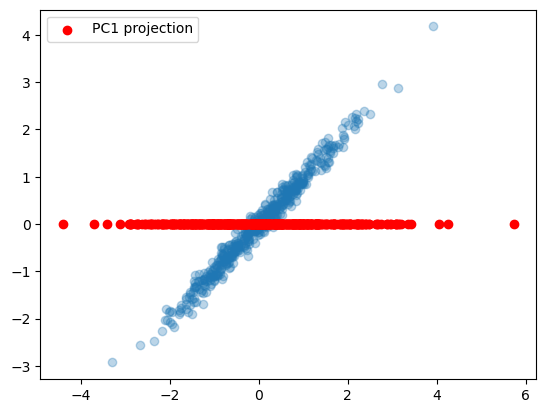

In [ ]:

plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.3)
plt.scatter(reduced_data, np.zeros_like(reduced_data), color='red', label='PC1 projection')
plt.legend()
plt.show()
